<a href="https://colab.research.google.com/github/ehdwls314/prac_class/blob/main/%EC%9E%AC%EB%82%9C%EC%A7%80%EC%9B%90%EA%B8%88%EC%9D%98_%EC%86%8C%EB%B9%84%ED%8C%A8%ED%84%B4_%EC%A7%91%EC%A4%91_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제 선정: 재난지원금의 소비패턴 집중 분석
#### 재난지원금의 목적: 코로나19위기 극복을 위한 정부의 한시적인 지원제도, 국민 생활 안정과 경제회복 지원을 목적으로 한다.

- 우리는 주어진 제공받은 데이터 중, 재난지원금에 대한 인사이트를 파악하기 위하여 먼저 총 사용금액과 재난지원금사용금액을 시각화하여 비교하였다. 

In [ ]:
library(ggplot2)
library(RColorBrewer)
library(dplyr)
library(devtools)
library(rvest)
library(maps)
library(ggmap)
library(ggplot2)
library(raster)
library(rgeos)
library(maptools)
library(rgdal)
library(gridExtra)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'devtools' was built under R version 3.6.3"Loading required package: usethis
Warning message:
"package 'usethis' was built under R version 3.6.3"Warning message:
"package 'rvest' was built under R version 3.6.3"Loading required package: xml2
Warning message:
"package 'maps' was built under R version 3.6.3"Warning message:
"package 'ggmap' was built under R version 3.6.3"Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.
Please cite ggmap if you use it! See citation("ggmap") for details.


ERROR: Error in library(raster): there is no package called 'raster'


# 데이터 전처리
- is.na 함수를 사용하여 결측치 합이 0이므로 결측치가 없는 것으로 파악하였다.
- 필요 없는 “x시” 값의 행을 제거하였다.

In [ ]:
a <- read.csv("KRI-DAC_Jeju_data5.csv")
b <- read.csv("KRI-DAC_Jeju_data6.csv")
c <- read.csv("KRI-DAC_Jeju_data7.csv")
d <- read.csv("KRI-DAC_Jeju_data8.csv")


In [ ]:
c <- c[,-c(6,7)]


ab <- rbind(a,b)
cd <- rbind(c,d)
df <- rbind(ab,cd)

sum(is.na(df)) # 결측치 합이 0이므로 결측치가 없는 것으로 파악!

df1 <- filter(df,Time!="x시")
head(df1)


[1] 0

OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y
1,1,202005,제주특별자치도,제주시,영세,일반한식,00시,363000,66500,10,2,877006.0,1479766
2,2,202005,제주특별자치도,제주시,영세,단란주점,00시,1180000,0,3,0,877005.7,1479816
3,3,202005,제주특별자치도,제주시,중소1,편의점,00시,157670,6850,20,2,877056.7,1479616
4,4,202005,제주특별자치도,제주시,영세,편의점,00시,46600,0,2,0,877056.0,1479766
5,5,202005,제주특별자치도,제주시,영세,주점,00시,66000,0,2,0,877055.5,1479866
6,6,202005,제주특별자치도,제주시,영세,스넥,00시,159000,0,3,0,877205.4,1479867


# 시각화 및 분석
- insight 도출

`summarise()` ungrouping output (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)


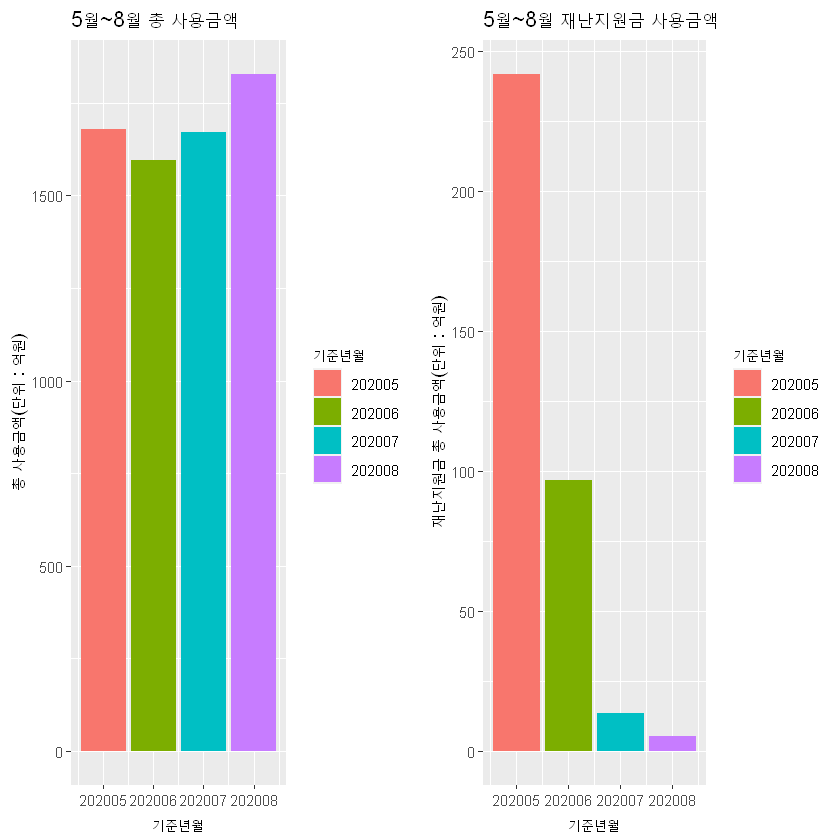

In [ ]:
#x:달 y: 총액
by_YM <- group_by(df1,YM)
data1 <-summarise(by_YM,YM_total=sum(TotalSpent/100000000))
A1<-ggplot(data=data1,mapping=aes(x=YM,y=YM_total,fill=as.factor(YM)))+
  geom_bar(stat="identity")+

labs(
  title="5월~8월 총 사용금액",
  x="기준년월",
  y="총 사용금액(단위 : 억원)", 
  fill="기준년월"
  )
by_YM <- group_by(df1,YM)
data2 <-summarise(by_YM,YM_Dis=sum(DisSpent/100000000))

A2<-ggplot(data=data2 ,mapping=aes(x=YM,y=YM_Dis,fill=as.factor(YM)))+
  geom_bar(stat="identity")+
  labs(
    title="5월~8월 재난지원금 사용금액",
    x="기준년월",
    y="재난지원금 총 사용금액(단위 : 억원)",
    fill="기준년월"
  )
grid.arrange(A1,A2,ncol=2)

## insight1. 
- 월별 총 사용금액과 월별 재난지원금사용금액을 확인해보니, 총 사용금액의 경우 6월 달에는 잠시 감소하는 경향이 있었으나 다시 증가하는 경향이 있었고, 재난지원금사용금액은 감소하는 경향을 파악할 수 있었다.

- 우리는 총 사용금액이 재난지원금사용금액을 가장 많이 사용했던 달인 5월에 가장 많고, 재난지원금사용금액의 경향에 따라 총 사용금액도 달이 갈수록 감소할 것이라고 예상했다.

- 그러나 5월의 총 사용금액이 약간 많은 것을 제외하고는 총 사용금액의 변화가 크지 않았다.
##### 따라서 재난지원금사용금액은 총 사용금액에 큰 영향을 주지 못한다는 결론을 내릴 수 있다.
# 

`summarise()` ungrouping output (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)


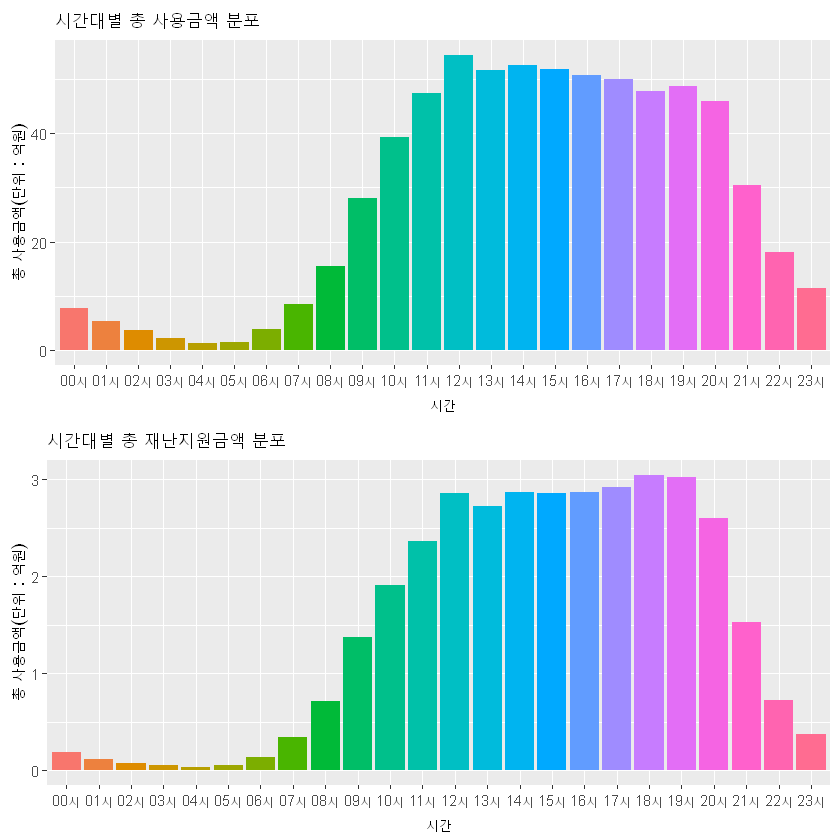

In [ ]:
# 시간대별 
# 전체 
by_Time <- group_by(df1,Time)
data4 <-summarise(by_Time,total_time=sum(TotalSpent))
B1 <- ggplot(data=data4,mapping=aes(x=Time,y=(total_time/1000000000), fill =Time))+
  geom_bar(stat="identity")+
  labs(
    title="시간대별 총 사용금액 분포",
    x="시간",
    y="총 사용금액(단위 : 억원)"
  )+theme(legend.position = "none")

#재난지원금
data5 <-summarise(by_Time,total_time=sum(DisSpent))
B2 <- ggplot(data=data5,mapping=aes(x=Time,y=(total_time/1000000000), fill =Time))+
  geom_bar(stat="identity")+
  labs(
    title="시간대별 총 재난지원금액 분포",
    x="시간",
    y="총 사용금액(단위 : 억원)"
  )+theme(legend.position = "none")

grid.arrange(B1, B2, nrow = 2)


### insight2. 
- 두 분포 모두 전체적으로 비슷한 양상을 보이고 있으나, 자세히 보면 시간별 총 사용금액과 재난지원금사용금액을 비교하여 총 사용금액은 12시부터 14시에 판매금액이 가장 많았고, 재난지원금사용금액은 17시부터 19시에 가장 판매금액이 많다는 것을 확인하였다.

- 미세하지만 총 사용금액과 재난지원금액이 가장 많이 쓰이는 시간대가 다름을 확인할 수 있다.
# 

다음은 Point_X와 Point_Y를 위도와 경도로 변환하여 공간정보를 지도로 시각화하였다.

In [ ]:
# 위경도를 바꾸는 함수
convertCoordSystem <- function(long, lat, from.crs, to.crs){
  xy <- data.frame(long=long, lat=lat)
  coordinates(xy) <- ~long+lat
  
  from.crs <- CRS(from.crs)
  from.coordinates <- SpatialPoints(xy, proj4string=from.crs)
  
  to.crs <- CRS(to.crs)
  changed <- as.data.frame(SpatialPoints(spTransform(from.coordinates, to.crs)))
  names(changed) <- c("long", "lat")
  
  return(changed)
}

df_l <- df1[ , c('POINT_X', 'POINT_Y')]
from.crs = "+proj=tmerc +lat_0=38 +lon_0=127.5 +k=0.9996 +x_0=1000000 +y_0=2000000 +ellps=GRS80 +units=m +no_defs"

to.crs = "+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs"
df_l <- cbind(df_l, convertCoordSystem(df_l$POINT_X, df_l$POINT_Y, from.crs, to.crs))
df_s <- df_l[ , c('long', 'lat')]
head(df_s)
head(df_s)
df1[ , c('POINT_X', 'POINT_Y')] <- df_s

In [ ]:
# 지도시각화 재난지원금
df_DisSpent <- df1[, c('DisSpent', 'POINT_X', 'POINT_Y')] # 위치별 재난지원금 사용 보기
head(df_DisSpent)
g1 <- ggmap(get_map(location='Hallasan National Park', zoom=10)) +
  stat_density_2d(data=df_DisSpent, aes(x=POINT_X, y=POINT_Y, fill=..level.., alpha=..level..), geom='polygon', size=7, bins=28)+
  labs(title = '위치별 재난지원금 사용 분포도')
g1<- g1 + scale_fill_gradient(low='yellow', high='red')
g1 + scale_fill_gradient(low='yellow', high='red', guide=F) + scale_alpha(range=c(0.02, 0.8), guide=F)


지도시각화는 댓글의 링크로 들어가시면 확인하실 수 있습니다.

# 
- 우리는 재난지원금사용금액만을 시각화하여 비교하는 것보다 전체 총 사용금액 대비 재난지원금사용금액의 비율을 사용하여 Type별로 시각화하는 것이 재난지원금의 특성을 더욱 잘 나타내리라 판단하였다. 
##### 따라서 전체 총 사용금액 대비 재난지원금사용금액 비율을 Type별로 분류하여 상위 및 하위 10개를 시각화하여 비교하였다.

`summarise()` ungrouping output (override with `.groups` argument)


[1] 일반한식       슈퍼마켓       농축협직영매장 편의점         주유소        
 [6] 농협하나로클럽 스포츠레져용품 약국           서양음식       농축수산품    
206 Levels: 1급호텔 2급호텔 CATV DVD음반테이프판매 LPG 가례서비스 ... 정보서비스

[1] 기타광학품     정보서비스     카메라         택시           기타교통수단  
 [6] 유아원         테니스장       초중고교육기관 제약회사       견인서비스    
206 Levels: 1급호텔 2급호텔 CATV DVD음반테이프판매 LPG 가례서비스 ... 정보서비스

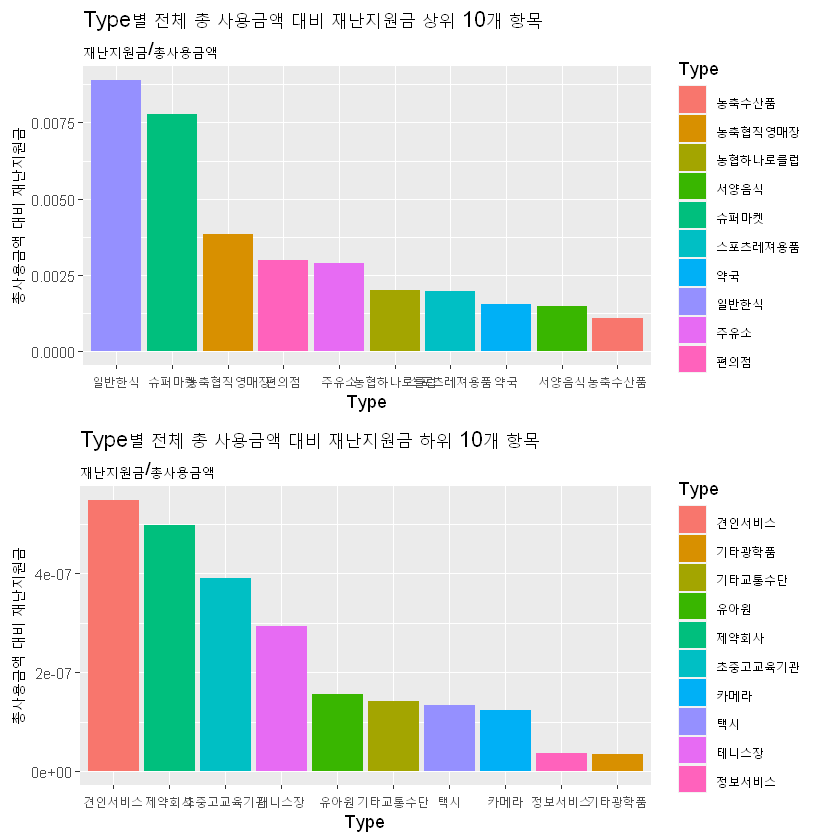

In [ ]:
# Type별 총사용금액분의 재난지원금 상위 10
df1$Sum_total<-sum(df1$TotalSpent)
df2<- df1[df1$NumofDisSpent>0,]
by_Type<-group_by(df2,Type)
by_typetotal<-summarise(by_Type,total_type=sum(DisSpent/Sum_total))
rank_type10<-arrange(by_typetotal, desc(total_type)) %>% slice(1:10)
unique(rank_type10$Type) # Type목록확인
s1 <- ggplot(data=rank_type10,mapping=aes(x=reorder(Type,-total_type),y=total_type, fill=Type))+
  geom_bar(stat="identity")+
  labs(title="Type별 전체 총 사용금액 대비 재난지원금 상위 10개 항목",x='Type',y='총사용금액 대비 재난지원금',
       subtitle="재난지원금/총사용금액",fill="Type")

#Type별 총사용금액분의 재난지원금 하위 10

rank_typeworst10<-arrange(by_typetotal, total_type) %>% slice(1:10)
unique(rank_typeworst10$Type)
s2 <- ggplot(data=rank_typeworst10,mapping=aes(x=reorder(Type,-total_type),y=total_type, fill=Type))+
  geom_bar(stat="identity")+
  labs(title="Type별 전체 총 사용금액 대비 재난지원금 하위 10개 항목",x='Type',y='총사용금액 대비 재난지원금',
       subtitle="재난지원금/총사용금액",fill="Type")

grid.arrange(s1, s2, nrow = 2)

### insight4. 
- 상위 10개를 통해, 일반한식과 슈퍼마켓, 농축협직영매장 업종이 가장 많이 판매되는 것을 확인하였다. 따라서 재난지원금은 주로 가정에 필요한 물품들을 사용한다는 것을 확인하였다.

### insight5. 
- 하위 10개 중, 대부분 Type들은 재난지원금을 사용하여 쉽게 구매할 수 없는 업종들이었다. 그 중, 택시 업종은 재난지원금의 사용 비율이 낮은 것으로 보아, 택시 업종은 재난지원금의 효과를 보지 못하는 것을 알 수 있다.
# 

다음은 FranClass별 전체 총 사용금액 대비 재난지원금사용금액의 비율을 비교하였다.

`summarise()` ungrouping output (override with `.groups` argument)


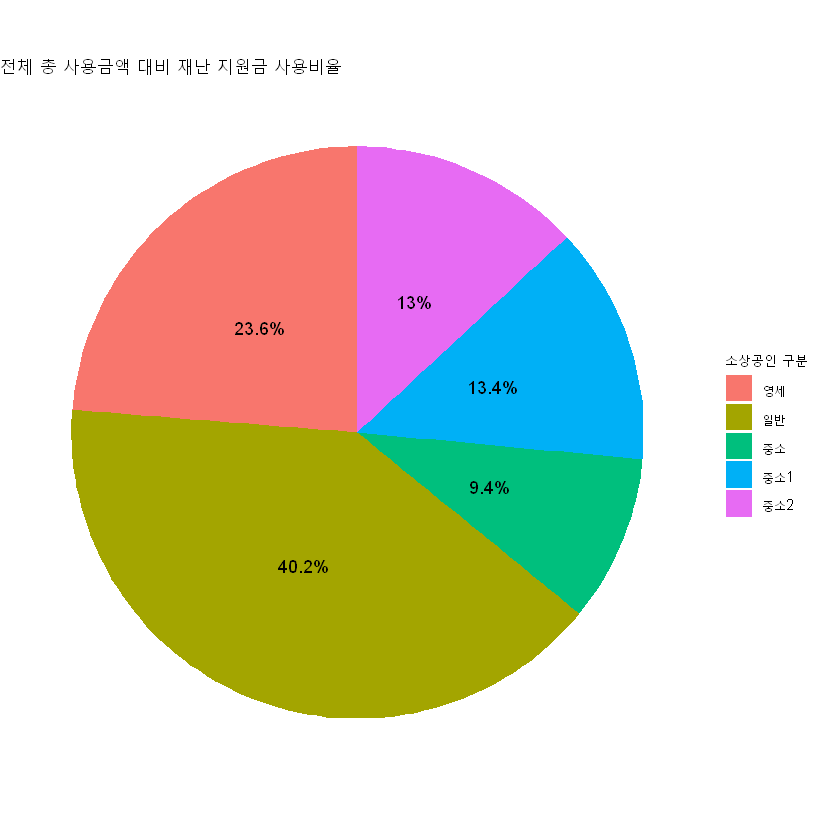

In [ ]:
by_Fran<-group_by(df1,FranClass)
data3<-summarise(by_Fran,prop_Dis = sum(DisSpent/Sum_total))
ggplot(data=data3,mapping=aes(x="",y=prop_Dis,fill=FranClass))+
  geom_bar(stat="identity")+
  coord_polar("y")+
  geom_text(aes(label= paste0(round(prop_Dis*18.86*100,1), "%")),
            position = position_stack(vjust = 0.5))+
  theme_void()+
  labs(
    title="전체 총 사용금액 대비 재난 지원금 사용비율",
    x="소상공인 구분",
    y="사용비율",
    fill="소상공인 구분"
  )

### insight6. 
- 그 결과, 일반(전년도 매출 30억 이상 소상공인)에 가장 많은 재난지원금이 사용되었고, 영세(전년도 매출 3억 이하 소상공인)가 두 번째로 많은 재난지원금이 사용되었다. 또한, 일반(전년도 매출 30억 이상 소상공인)과 영세(전년도 매출 3억 이하 소상공인)의 데이터 수를 확인한 결과, 영세 소상공인들이 일반 소상공인들보다 데이터의 양이 약 6배나 많은 것을 확인하였다. 

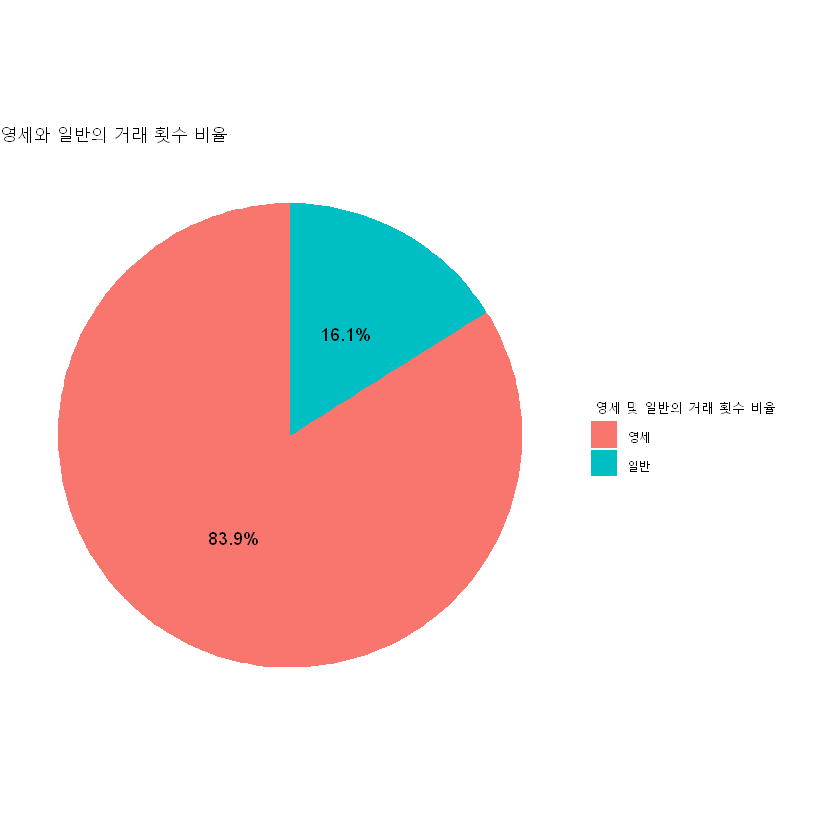

In [ ]:
######################################################총 사용금액 대비 재난 지원금 사용비율 완료
asd <- df1 %>% group_by(FranClass) %>% count()
asd1 <- filter(asd, FranClass %in% c("영세", "일반"))
ggplot(data=asd1,mapping=aes(x='', y = n, fill=FranClass))+
  geom_bar(stat="identity")+
  geom_text(aes(label= paste0(round(n/sum(n) * 100,1), "%")),
            position = position_stack(vjust = 0.5))+
  coord_polar('y')+
  theme_void()+
  labs(
    title="영세와 일반의 거래 횟수 비율",
    x=" n ",
    y="사용비율",
    fill=" 영세 및 일반의 거래 횟수 비율"
  )

- 우리는 영세 소상공인들의 압도적인 판매 횟수에도 불구하고, 재난지원금사용금액이 일반 소상공인들보다 적은 결과를 보아, 재난지원금이 편향되게 사용되어 지고 있다는 문제점을 도출하였다. 

- 그리고 추가적인 인터넷 검색을 통해, 정부가 지급한 1차 재난지원금이 주로 대형마트에 사용되었고, 자영업자가 몰린 식당 등의 매출은 상대적으로 떨어져 재난지원금의 수혜를 크게 보지 못함을 보여주는 뉴스 기사를 볼 수 있었다. 

##### 이를 통해, 우리가 찾은 문제점과 동일한 문제점이 현실에서 실질적으로 나타나고 있음을 확인하였다. 따라서 우리는 기존의 데이터set에서 
##### FranClass:일반 소상공인을 대형마트, FranClass: 영세 소상공인을 자영업자로 대입하여 각각의 데이터만을 뽑아 비교하고자 한다.




# 

다음은 일반 소상공인과 영세 소상공인의 총 사용금액을 타입별로 분류 및 비교하여 매출 상위, 하위 10개를 도출하였다. 

`summarise()` ungrouping output (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)


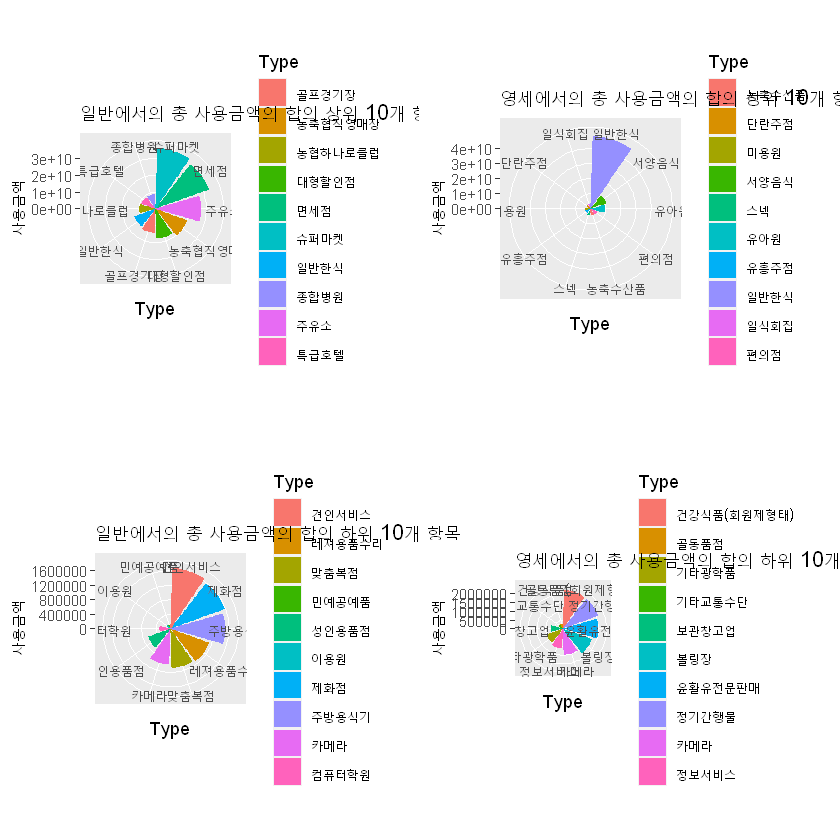

In [ ]:
#일반 상위10퍼 뽑아 총사용금액
df5<- df1[df1$FranClass =="일반", ]
by_Type5 <- group_by(df5,Type)
by_typetotal5 <-summarise(by_Type5,total5=sum(TotalSpent))

rank_type105<-arrange(by_typetotal5, desc(total5))%>% slice(1:10)
C1 <- ggplot(data=rank_type105,mapping=aes(x=reorder(Type,-total5),y=total5, fill = Type))+
  geom_bar(stat="identity") +
  coord_polar()+labs(
    title="일반에서의 총 사용금액의 합의 상위 10개 항목",
    x="Type",
    y="사용금액",
    fill="Type"
  )
  
#일반 하위10퍼 뽑아 총사용금액

rank_worsttype105<-arrange(by_typetotal5, total5)%>% slice(1:10)
C3 <- ggplot(data=rank_worsttype105,mapping=aes(x=reorder(Type,-total5),y=total5,fill=Type))+
  geom_bar(stat="identity") +
  coord_polar()+labs(
    title="일반에서의 총 사용금액의 합의 하위 10개 항목",
    x="Type",
    y="사용금액",
    fill="Type"
  )

#영세 상위10퍼 뽑아 총사용금액
df6<- df1[df1$FranClass =="영세", ]
by_Type6 <- group_by(df6,Type)
by_typetotal6 <-summarise(by_Type6,total6=sum(TotalSpent))

rank_type106<-arrange(by_typetotal6, desc(total6))%>% slice(1:10)
C2 <- ggplot(data=rank_type106,mapping=aes(x=reorder(Type,-total6),y=total6,fill=Type))+
  geom_bar(stat="identity")+
  coord_polar()+labs(
    title="영세에서의 총 사용금액의 합의 상위 10개 항목",
    x="Type",
    y="사용금액",
    fill="Type"
  )


#영세 하위10퍼 뽑아 총사용금액

rank_worsttype106<-arrange(by_typetotal6, total6)%>% slice(1:10)
C4 <- ggplot(data=rank_worsttype106,mapping=aes(x=reorder(Type,-total6),y=total6,fill=Type))+
  geom_bar(stat="identity")+
  coord_polar()+labs(
    title="영세에서의 총 사용금액의 합의 하위 10개 항목",
    x="Type",
    y="사용금액",
    fill="Type"
  )

grid.arrange(C1, C2, C3, C4, ncol = 4)

##  insight7. 
- 상위 10개를 통해, 일반과 영세 소상공인의 총 사용금액을 비교한 결과, 일반 소상공인에서는 슈퍼마켓, 면세점, 주유소, 농축협직영매장 순으로, 영세 소상공인에서는 일반한식, 서양음식, 유아원, 편의점이 뒤를 이었다.
##### 
- 특이점으로는, 영세 소상공인은 일반한식이 압도적으로 많이 판매되는 것을 확인하였다. 또한 일반에서의 상위 품목과 영세에서의 상위 품목이 대부분 다른 것을 확인하였다. 

# 

다음은 일반 소상공인과 영세 소상공인의 총사용금액 대비 재난지원금사용금액을 타입별로 분류 및 비교하여 매출 상위, 하위 10개를 도출하였다. 

`summarise()` ungrouping output (override with `.groups` argument)


[1] 일반한식       슈퍼마켓       농축협직영매장 편의점         주유소        
 [6] 농협하나로클럽 스포츠레져용품 약국           서양음식       농축수산품    
206 Levels: 1급호텔 2급호텔 CATV DVD음반테이프판매 LPG 가례서비스 ... 정보서비스

[1] 기타광학품     정보서비스     카메라         택시           기타교통수단  
 [6] 유아원         테니스장       초중고교육기관 제약회사       견인서비스    
206 Levels: 1급호텔 2급호텔 CATV DVD음반테이프판매 LPG 가례서비스 ... 정보서비스

`summarise()` ungrouping output (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)


[1] 가례서비스     기타광학품     정보서비스     카메라         콘도          
 [6] 택시           윤활유전문판매 치과병원       견인서비스     테니스장      
206 Levels: 1급호텔 2급호텔 CATV DVD음반테이프판매 LPG 가례서비스 ... 정보서비스

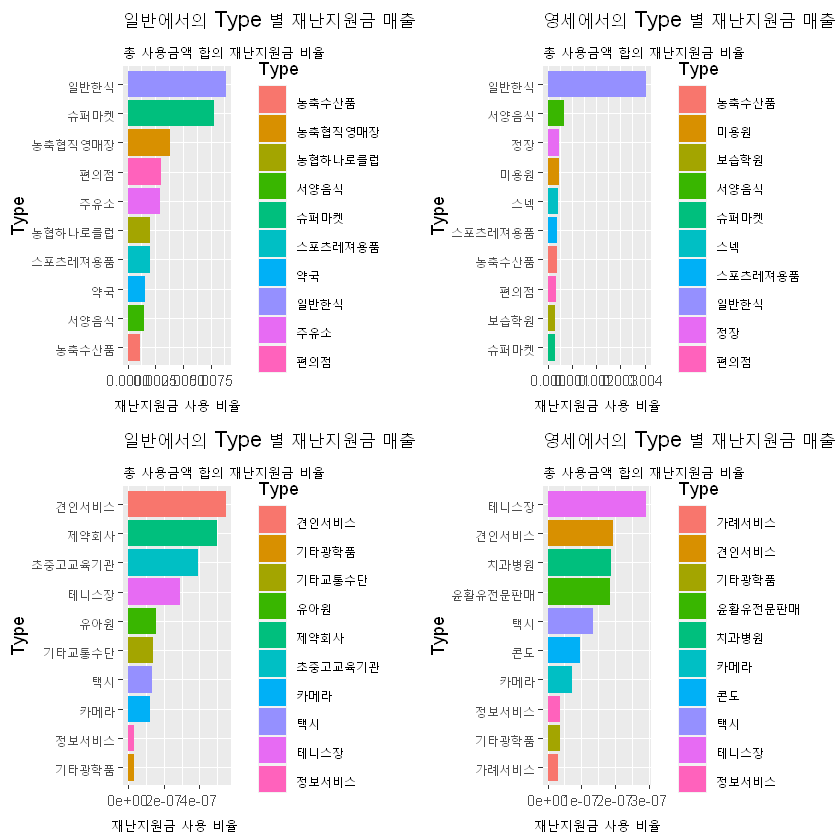

In [ ]:
#일반 재난지원금 사용 상위 10

by_Type2<-group_by(df2,Type)
by_typetotal2<-summarise(by_Type2,total_type=sum(DisSpent/Sum_total))
rank_type10<-arrange(by_typetotal2, desc(total_type)) %>% slice(1:10)
unique(rank_type10$Type)
D1 <- ggplot(data=rank_type10,mapping=aes(x=reorder(Type,total_type),y=total_type, fill=Type))+
  geom_bar(stat="identity")+
  coord_flip()+labs(title="일반에서의 Type 별 재난지원금 매출 상위 10개 항목",x='Type',y='재난지원금 사용 비율',
       subtitle="총 사용금액 합의 재난지원금 비율",fill="Type")

#전체 재난지원금 사용 하위 10개
rank_typeworst10<-arrange(by_typetotal2, total_type) %>% slice(1:10)
unique(rank_typeworst10$Type)
D3 <- ggplot(data=rank_typeworst10,mapping=aes(x=reorder(Type,total_type),y=total_type, fill=Type))+
  geom_bar(stat="identity")+
  coord_flip()+labs(title="일반에서의 Type 별 재난지원금 매출 하위 10개 항목",x='Type',y='재난지원금 사용 비율 ',
       subtitle="총 사용금액 합의 재난지원금 비율",fill="Type")


#영세 재난지원금 상위 10개
df2<- df1[df1$NumofDisSpent>0,]
df3<- df2[df2$FranClass == "영세", ]
by_Type3<-group_by(df3,Type)
by_typetotal3<-summarise(by_Type3,total_type=sum(DisSpent/Sum_total))
rank_type103<-arrange(by_typetotal3, desc(total_type)) %>% slice(1:10)
D2 <- ggplot(data=rank_type103,mapping=aes(x=reorder(Type,total_type),y=total_type, fill=Type))+
  geom_bar(stat="identity")+
  coord_flip()+
  labs(title="영세에서의 Type 별 재난지원금 매출 상위 10개 항목",x='Type',y='재난지원금 사용 비율',
       subtitle="총 사용금액 합의 재난지원금 비율",fill="Type")


#영세 재난지원금 하위 10개
df3<- df2[df2$FranClass == "영세", ]
by_Type3<-group_by(df3,Type)
by_typetotal3<-summarise(by_Type3,total_type=sum(DisSpent/Sum_total))
rank_typeworst103<-arrange(by_typetotal3, total_type) %>% slice(1:10)
unique(rank_typeworst103$Type)
D4 <- ggplot(data=rank_typeworst103,mapping=aes(x=reorder(Type,total_type),y=total_type, fill=Type))+
  geom_bar(stat="identity")+
  coord_flip()+
  labs(title="영세에서의 Type 별 재난지원금 매출 하위 10개 항목",x='Type',y='재난지원금 사용 비율',
       subtitle="총 사용금액 합의 재난지원금 비율",fill="Type")

grid.arrange(D1, D2, D3, D4, nrow = 2, ncol = 2)

########################################################################## 총 사용금액의 합의 재난지원금 비율 시각화 완료

### insight9. 
- 상위 10개 중, 일반 소상공인과 영세 소상공인의 겹치는 업종이 일반한식, 슈퍼마켓, 편의점, 스포츠레져용품, 농축수산품, 서양음식임을 볼 수 있다. 
- 이 중, 우리는 앞서 도출한 문제점에 초점을 맞추어 일반 소상공인(대형마트)의 재난지원금사용금액의 순위가 높지만, 이에 비해 영세 소상공인(자영업자)의 재난지원금의 비율의 순위가 떨어진 업종을 확인하였다.
###
- 이로 인한 가장 적절한 예시로 슈퍼마켓을 확인할 수 있었다.
- 슈퍼마켓은 일반 소상공인에서 재난지원금사용금액이 2위의 순위로 가장 높지만, 영세 소상공인에서는 10위의 낮은 순위를 보인다. 
##### 즉, 슈퍼마켓 업종은 대형마트와 자영업자의 경쟁에서 자영업자가 밀려 재난지원금 소비로 인한 경제 활성화의 혜택을 받지 못한다는 결론을 도출하였다.

### insight10. 
- 하위 10개 중, 일반과 영세 소상공인의 재난지원금사용금액을 비교한 결과, 일반 소상공인에서는 견인서비스, 제약회사, 중고교육기관으로 영세 소상공인에서는 테니스장, 견인서비스, 치과병원이 가장 적게 팔린 것을 확인하였다.

- 이를 통해 하위 10개 항목에서는 견인서비스가 공통적으로 재난지원금이 잘 사용되지 않는 것으로 확인되었다. 

지도시각화는 댓글의 링크로 들어가시면 확인하실 수 있습니다.